In [320]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [321]:
df=pd.read_excel('proj2dataset.xlsx',header=None)
c1=df.where(df[2]==1).dropna()[[0,1]].values
c2=df.where(df[2]==-1).dropna()[[0,1]].values
X=df[[0,1]].values
y=df[[2]].values


In [322]:
C = 0.1
m,n = X.shape
Xy = y * X
H = np.dot(Xy , Xy.T)

P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.T*1.0)
b = cvxopt_matrix(np.zeros(1))


In [323]:
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
lambdas = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -1.5442e+01 -1.8697e+01  6e+02  2e+01  2e-14
 1: -2.6234e+00 -1.7244e+01  3e+01  8e-01  2e-14
 2: -1.8408e+00 -5.8926e+00  5e+00  3e-02  5e-15
 3: -2.1305e+00 -2.8586e+00  8e-01  6e-03  5e-15
 4: -2.3007e+00 -2.4963e+00  2e-01  1e-03  5e-15
 5: -2.3548e+00 -2.4008e+00  5e-02  2e-04  4e-15
 6: -2.3712e+00 -2.3732e+00  2e-03  2e-06  5e-15
 7: -2.3722e+00 -2.3722e+00  8e-05  5e-08  4e-15
 8: -2.3722e+00 -2.3722e+00  7e-06  3e-09  5e-15
 9: -2.3722e+00 -2.3722e+00  2e-07  3e-11  5e-15
Optimal solution found.


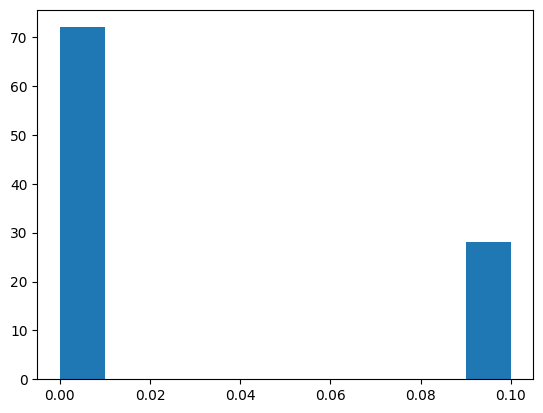

In [324]:
plt.hist(lambdas)
plt.show()

In [325]:
w = ((y * lambdas).T @ X).reshape(-1,1)
Sv = (lambdas > 0.08).flatten()
w0 = np.mean(y[Sv] - np.dot(X[Sv], w))



In [326]:
print(w.T,w0)

[[-0.65021699  0.66204158]] 0.336870630199809


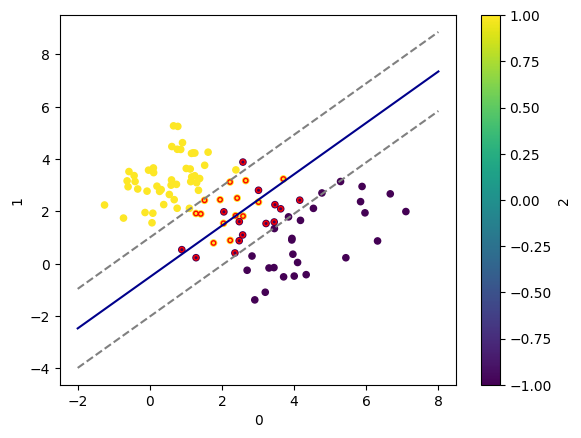

In [327]:
ax=df.plot.scatter(x=0,y=1,c=2,colormap='viridis')
plt.scatter(X[Sv].T[0], X[Sv].T[1], s=10, facecolors='none', edgecolors='r')

x1 = np.linspace(-2,8)
plt.plot(x1, -(x1*w[0] +w0)/w[1], color = 'darkblue')
plt.plot(x1, -(x1*w[0] +w0 -1)/w[1], color = 'grey',linestyle='--')
plt.plot(x1, -(x1*w[0] +w0 +1)/w[1], color = 'grey',linestyle='--')

plt.show()


In [ ]:
# write test